In [86]:
from proj_1_module import *
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

# Population model

\begin{align}
    \dot P(t) = (B - D) P(t), \qquad P(0) = P_0
\end{align}

The analytic solution is given by
\begin{align}
    P(t) =  P_0 \ e^{\ (B-D)t}
\end{align}

In [87]:
def test_dynamics_solve(birth_rate, death_rate, P0 = 100,stepSize = 0.001, total_time = 100):
    def population_model(t, P, B = birth_rate, D = death_rate):
        return (B-D)*P
    B = birth_rate
    D = death_rate
    t0 = 0
    num_points = int(total_time / stepSize)



    T_Euler, S_Euler = dynamics_solve(population_model, D = 1, t_0 = t0, s_0=P0, h = stepSize, N = num_points, method = 'Euler')
    T_RK2, S_RK2 = dynamics_solve(population_model, D = 1, t_0 = t0, s_0=P0, h = stepSize, N = num_points, method = 'RK2')
    T_RK4, S_RK4 = dynamics_solve(population_model, D = 1, t_0 = t0, s_0=P0, h = stepSize, N = num_points, method = 'RK4')
    S_ana = P0*np.exp( (B-D) * T_Euler)

    plt.figure(figsize=(12,8))
    plt.plot(T_Euler, S_Euler, label = 'Euler')
    plt.plot(T_RK2, S_RK2, label = 'RK2')
    plt.plot(T_RK4, S_RK4, label = 'RK4')
    plt.plot(T_Euler, S_ana, 'k--',label = 'Analytic')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Population model using Euler, RK2, and RK4')
    plt.show()

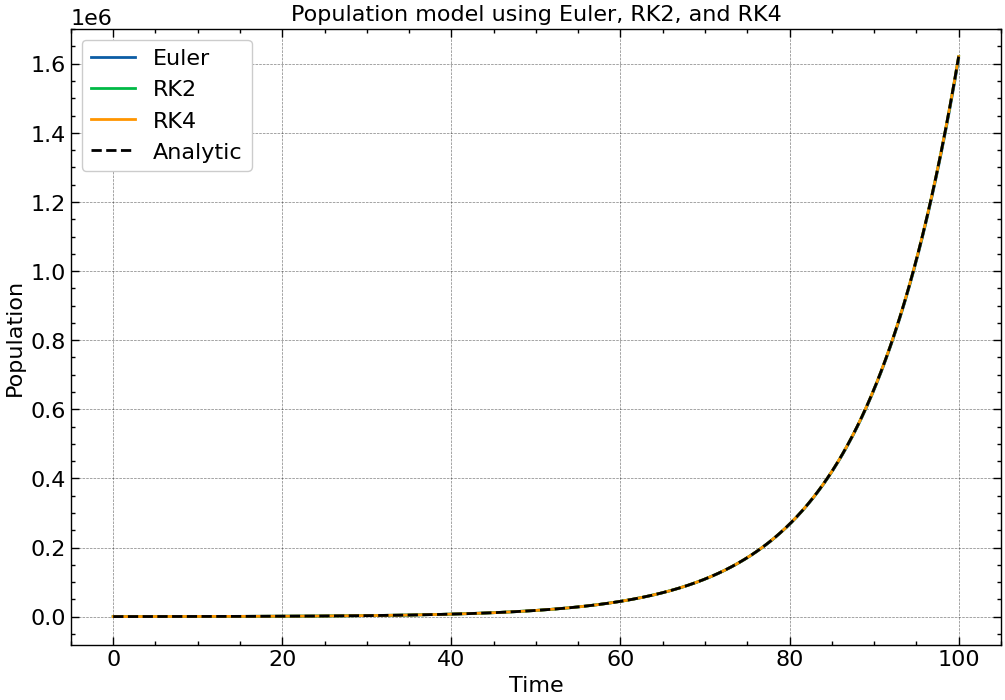

11.111111111111109


In [88]:
test_dynamics_solve(birth_rate=0.1, death_rate=0.01, P0=200 ,stepSize=0.01, total_time=100)
print(1/np.abs(0.1-0.01))

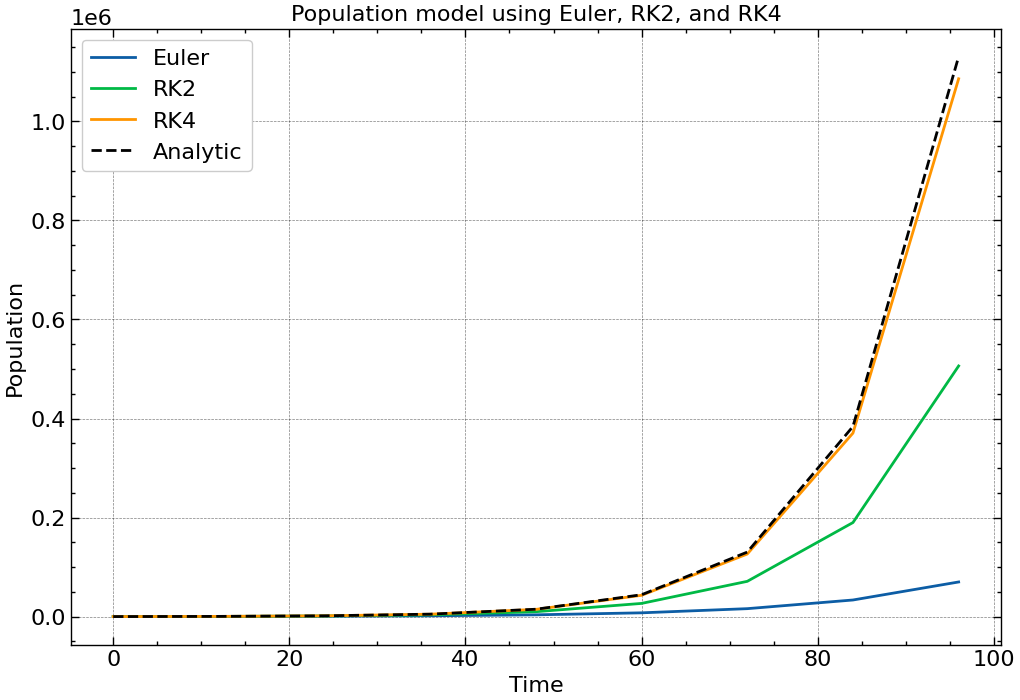

11.111111111111109


In [89]:
test_dynamics_solve(birth_rate=0.1, death_rate=0.01, P0=200 ,stepSize=12, total_time=100)
print(1/np.abs(0.1-0.01))

The nature time scale of this problem is the time constant $\frac{1}{|B-D|}$. This represents the time at which there will be a $\frac{1}{e}$ percent change in the system. If our step size is smaller than this value, the simulation will work well since we are not using approximation to neglect big changes in the functional value. As we have demonstrated in the example above, as the time step get greater than this value, the numeric solver approach is bad for Euler and Rk2.

# Simple Harmonic
$$
H = \frac{1}{2} k q^{2} + \frac{p^2}{2m}
$$
$$
\dot{q} = \frac{\partial H}{\partial p} = \frac{p}{m}
$$
$$
\dot{p} = -\frac{\partial H}{\partial q} = -kq
$$

In [90]:
import math

def DynamicTest(spring=1, mass=1, Q0=1, P0=0, stepSize=0.1, total_time=10):
    k = spring
    m = mass

    def dH_dq(q, p):
        return k * q

    def dH_dp(q, p):
        return p / m

    def Hamiltonian(q, p):
        return 0.5 * k * q**2 + 0.5 * (p**2) / m

    def calculate_energy(q, p, m, k):
        A = np.sqrt((p**2) / (k * m) + q**2)
        return 0.5*k*A**2
    
    def calculate_A_and_phi(x0, p0, m, k):
        omega = math.sqrt(k / m)
        A = math.sqrt((p0**2) / (k * m) + x0**2)
        phi = math.atan2(-p0 / (m * omega * A), x0 / A)
        return A, phi

    # Initial conditions
    q_0 = Q0
    p_0 = P0
    h = stepSize
    num_points = int(total_time / stepSize)
    methods = ["Euler", "RK2", "RK4", "SE", "SV"]

    T_analytic = 0

    plt.figure(figsize=(15, 8))
    for method in methods:
        T, Q, P = hamiltonian_solve(dH_dq, dH_dp, q_0=q_0, p_0=p_0, h=h, N=num_points, method=method)
        T_analytic = T
        plt.plot(T, Q, label=f"{method} - Position")
    A, phi = calculate_A_and_phi(Q0, P0, m, k)
    omega = np.sqrt(k/m)
    Q_analytic = A*np.cos(omega*T_analytic + phi)
    P_analytic = -m*A*omega*np.sin(omega*T_analytic+phi)
    plt.plot(T_analytic, Q_analytic,'k--' ,label = 'Analytic - Position')
    plt.title('Position Comparison of Methods')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(15, 8))
    for method in methods:
        T, Q, P = hamiltonian_solve(dH_dq, dH_dp, q_0=q_0, p_0=p_0, h=h, N=num_points, method=method)
        plt.plot(T, P, label=f"{method} - Momentum")
    plt.plot(T_analytic, P_analytic, 'k--' ,label = 'Analytic - Momentum')
    plt.title('Momentum Comparison of Methods')
    plt.xlabel('Time (s)')
    plt.ylabel('Momentum (kg*m/s)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(15, 8))
    for method in methods:
        T, Q, P = hamiltonian_solve(dH_dq, dH_dp, q_0=q_0, p_0=p_0, h=h, N=num_points, method=method)
        E = Hamiltonian(Q, P)
        plt.plot(T, E, label=f"{method} - Energy")
    plt.plot(T, [calculate_energy(Q0, P0, m , k)] * (T.size), 'k--',label = 'Analytic')
    plt.title('Energy Comparison of Methods')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (Joules)')
    plt.legend()
    plt.show()


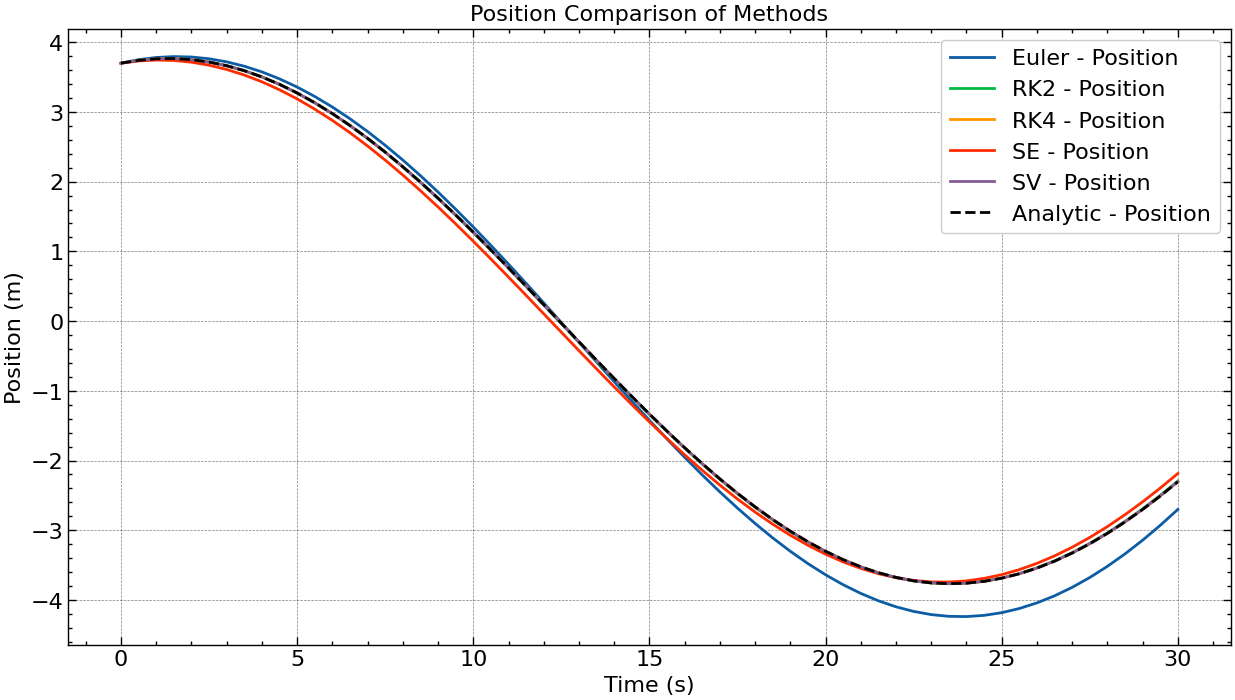

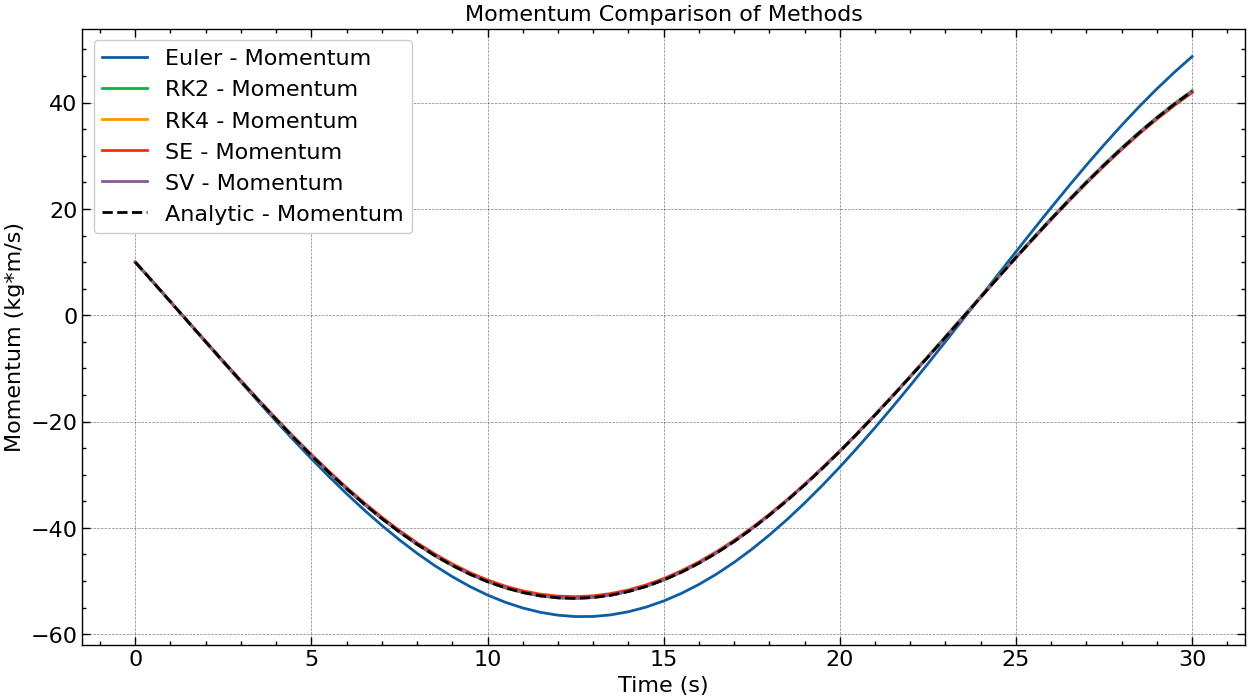

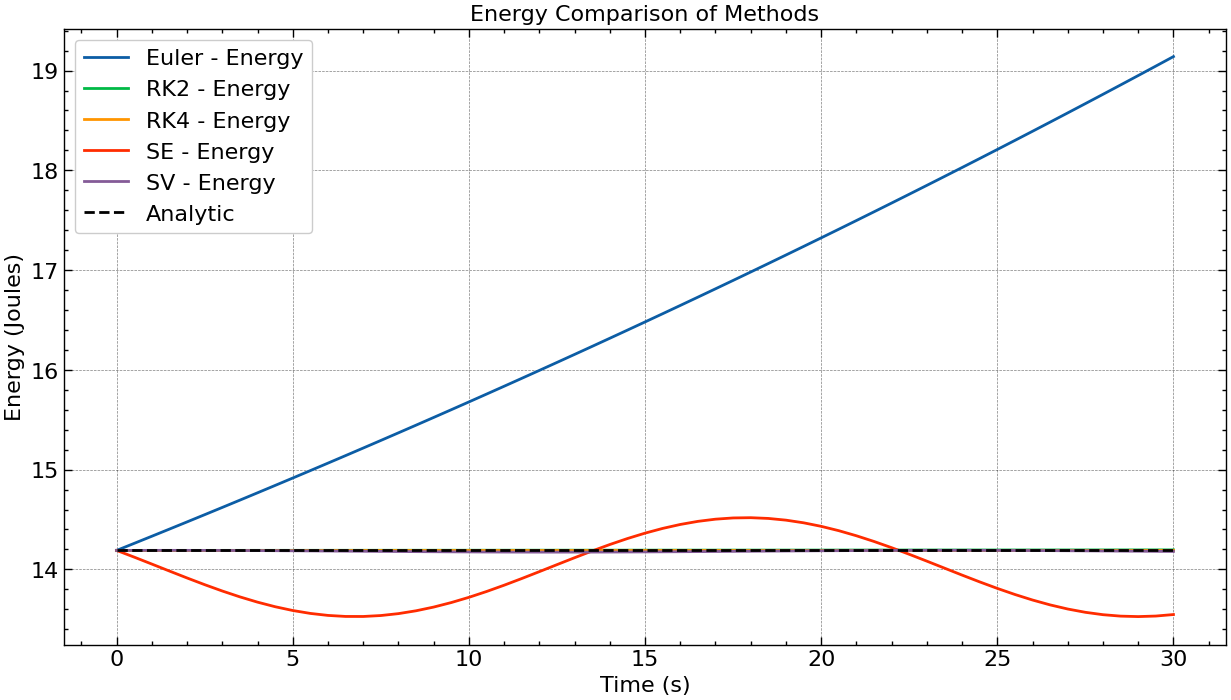

In [91]:
DynamicTest(spring=2, mass=100, Q0=3.7, P0=10, stepSize=0.5, total_time=30)

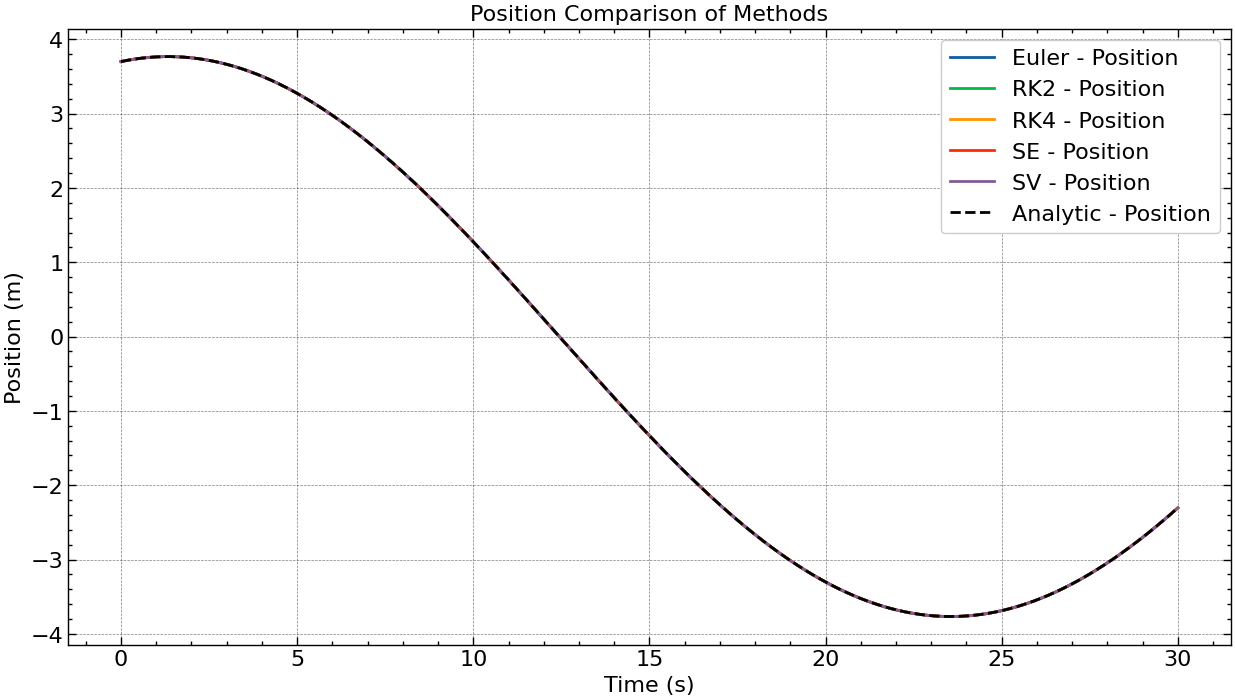

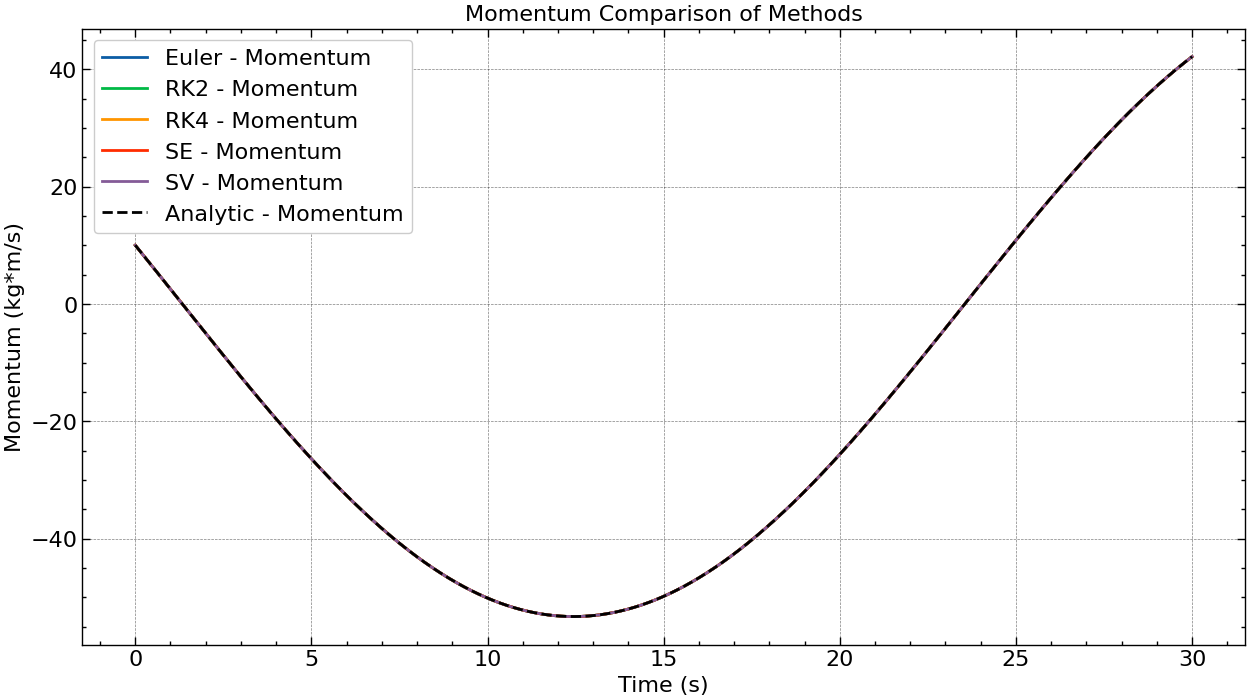

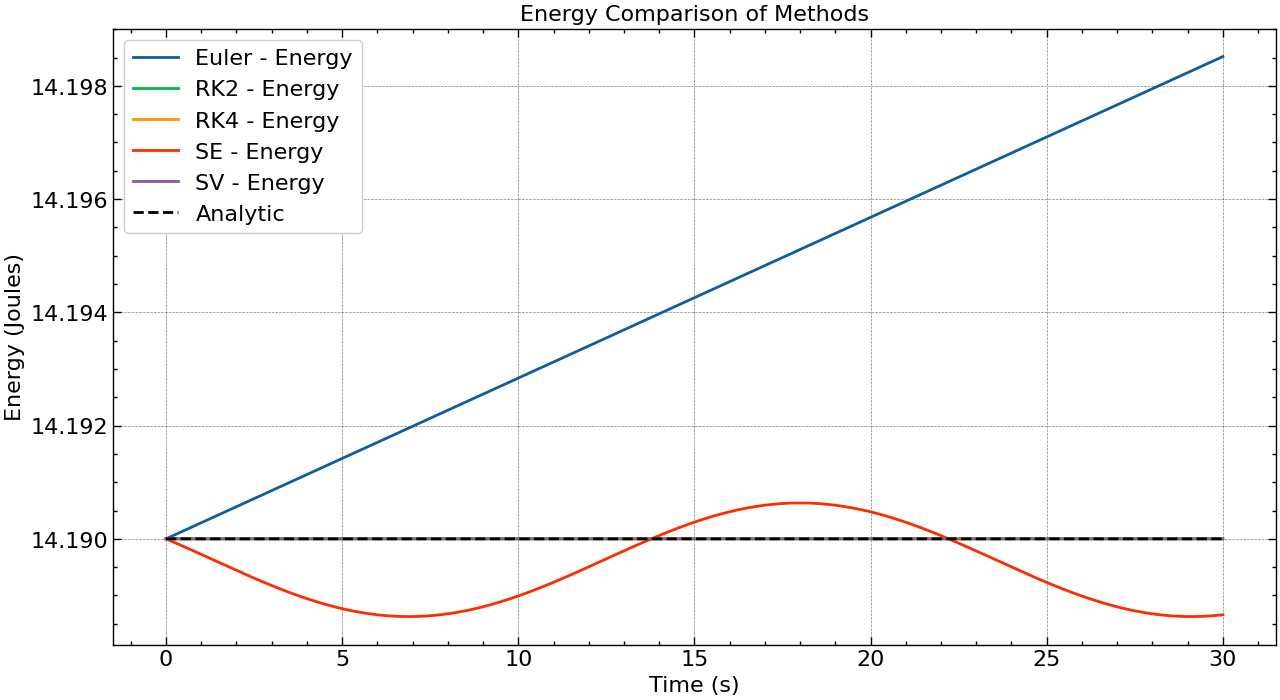

In [92]:
DynamicTest(spring=2, mass=100, Q0=3.7, P0=10, stepSize=0.001, total_time=30)

As we can see, as we make the step size very small, all methods match the exact solution very well.

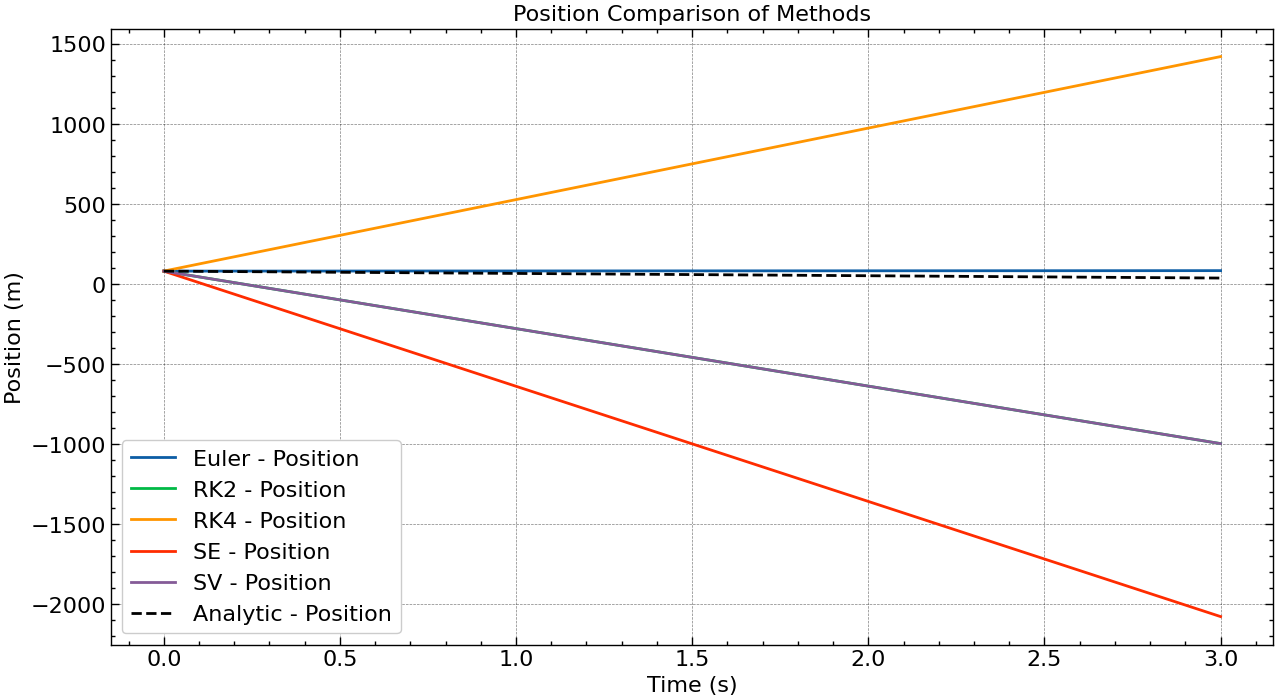

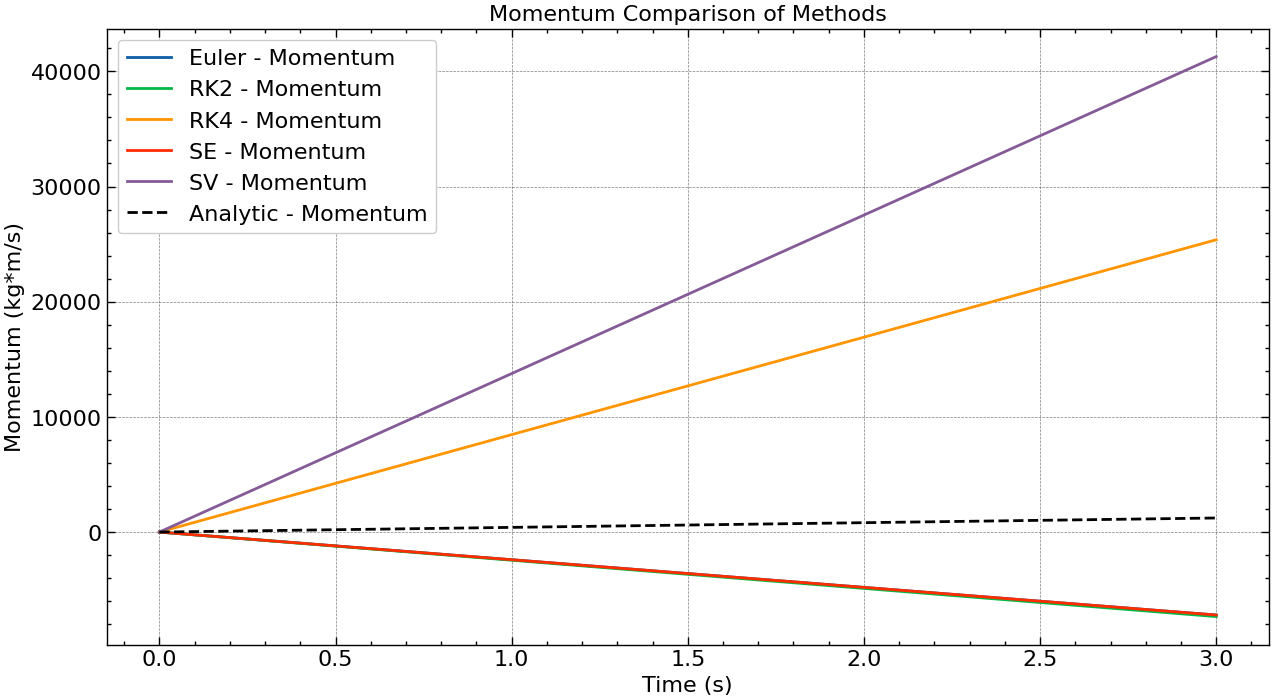

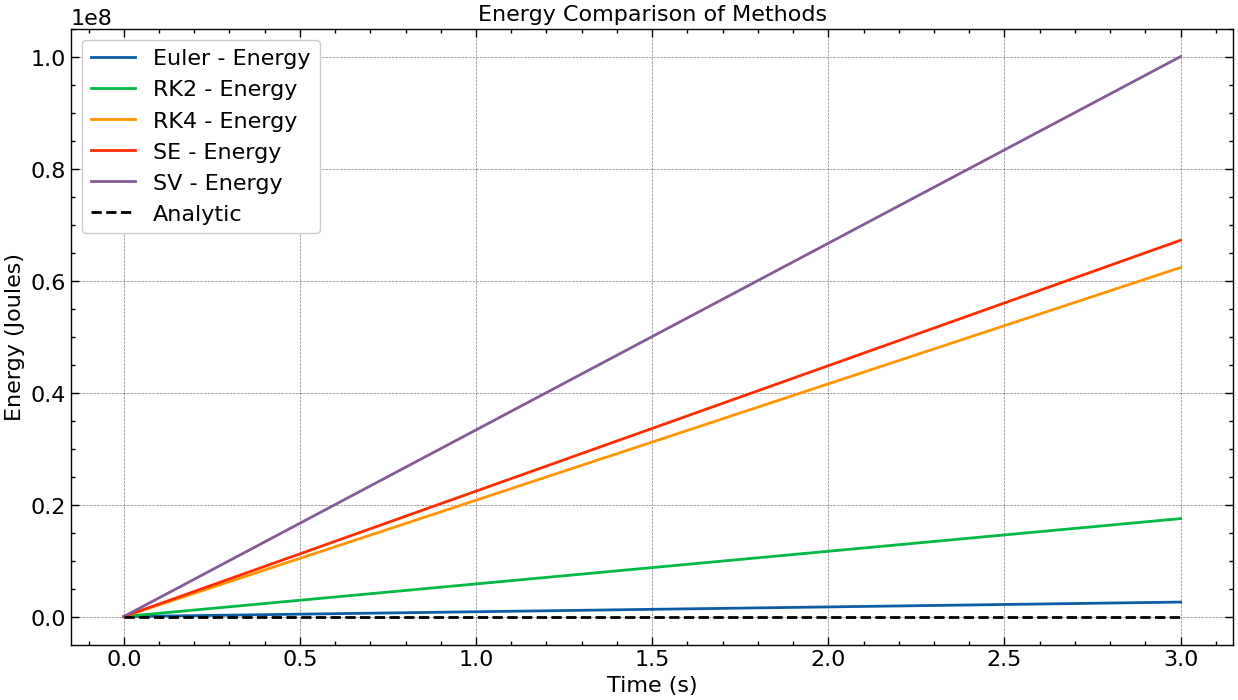

In [93]:
DynamicTest(spring=30, mass=10, Q0=80, P0=10, stepSize=3, total_time=5)

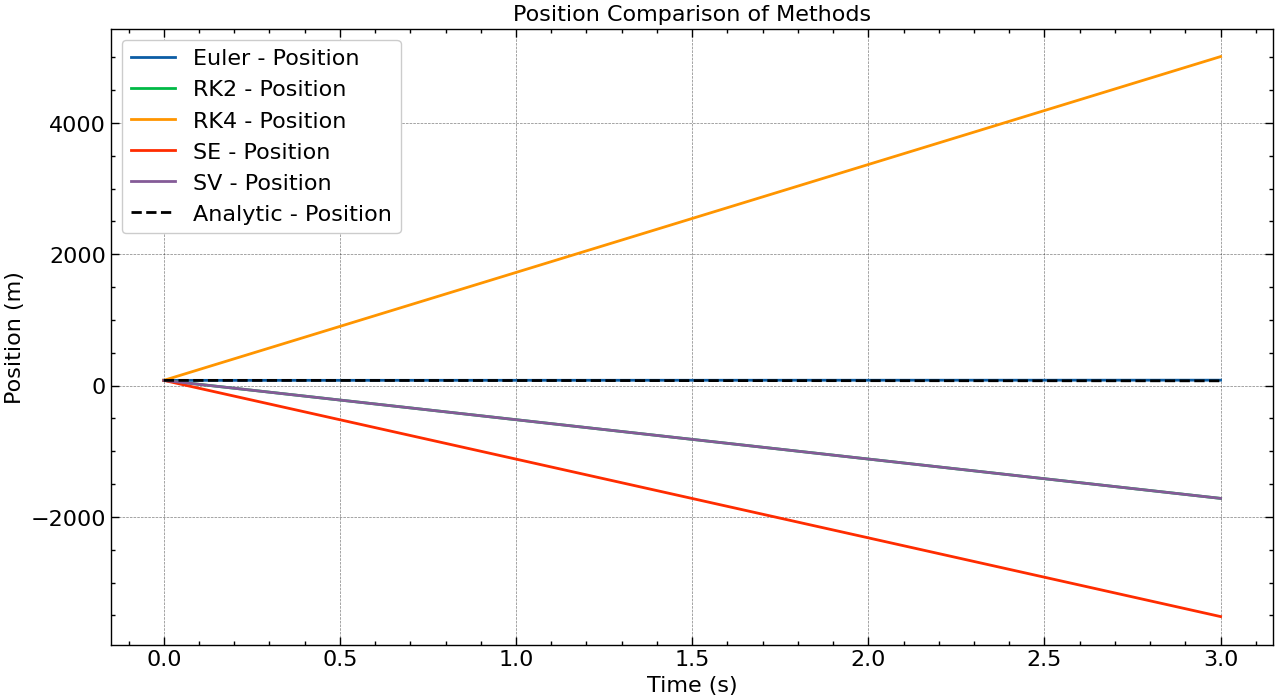

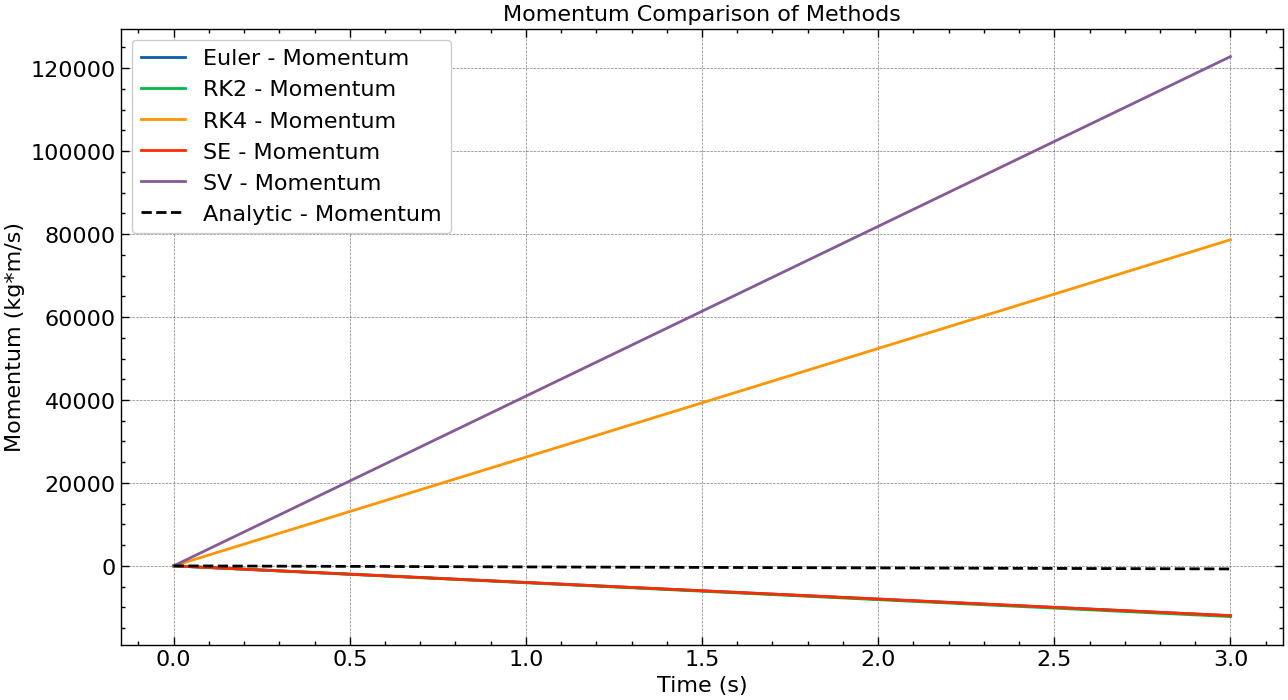

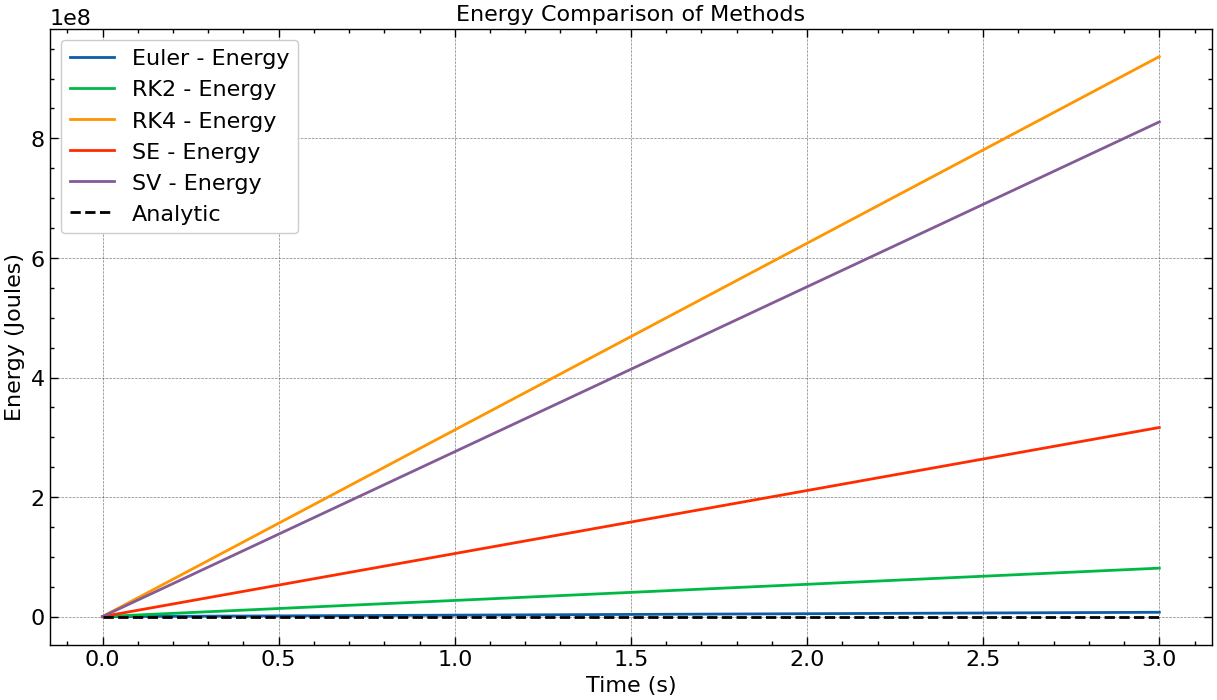

In [94]:
DynamicTest(spring=50, mass=10, Q0=80, P0=10, stepSize=3, total_time=5)

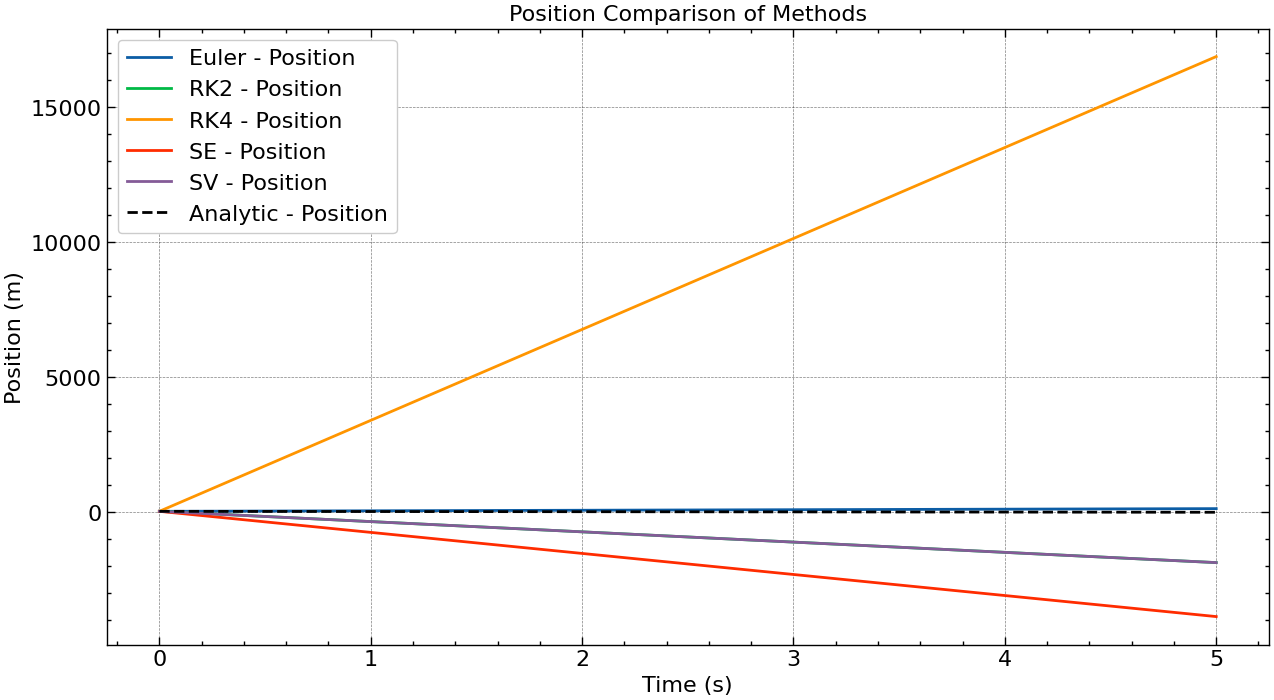

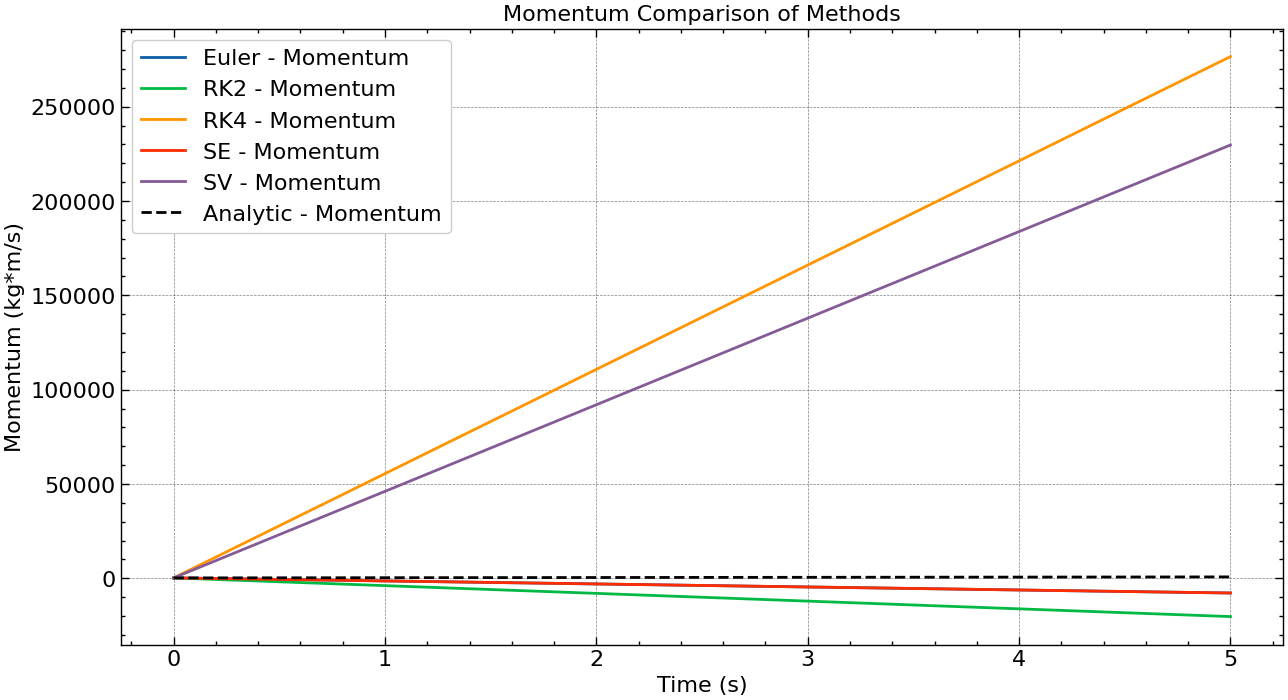

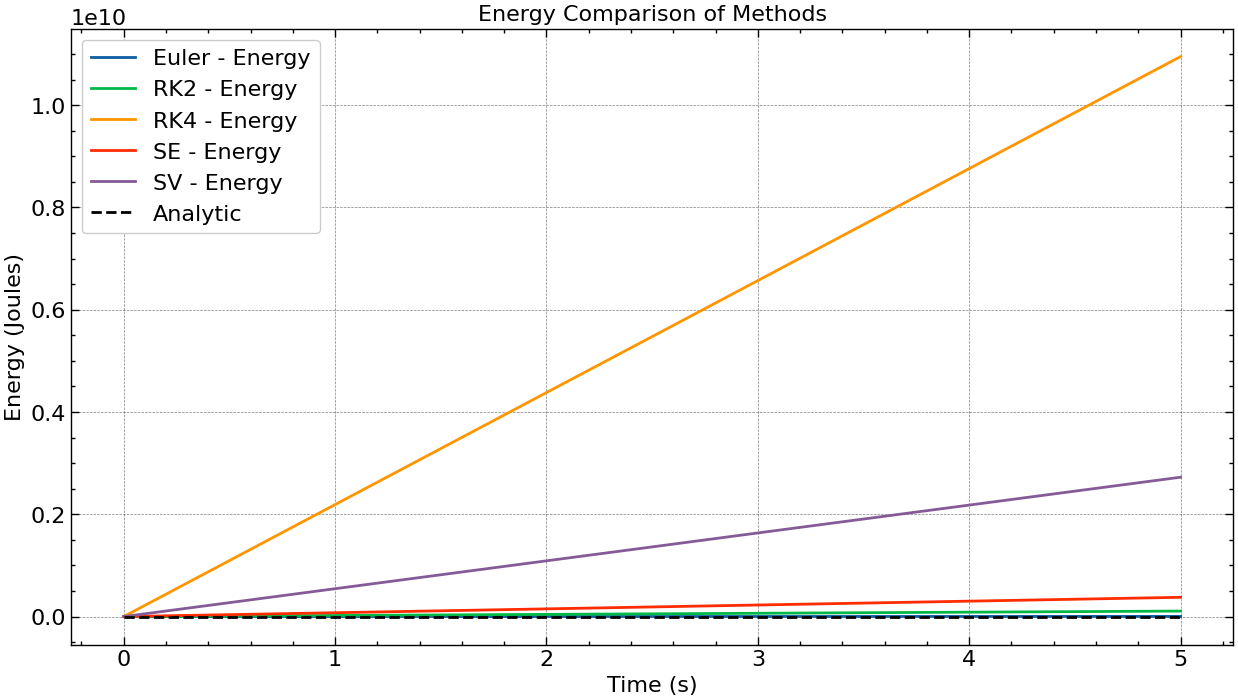

In [95]:
DynamicTest(spring=50, mass=10, Q0=32, P0=200, stepSize=5, total_time=5)

RK4 tends to over shoot position the most, and SV tends to over shoot momentum the most. SE and RK2 tends to underestimate momentum. Surprisingly, when the step size is not appriate, RK4 overestimate energy the most, whereas the Euler method conserve energy the best under this condition. The deviation in energy: RK4 > SV > SE > RK2 > Euler when stepsize is large.

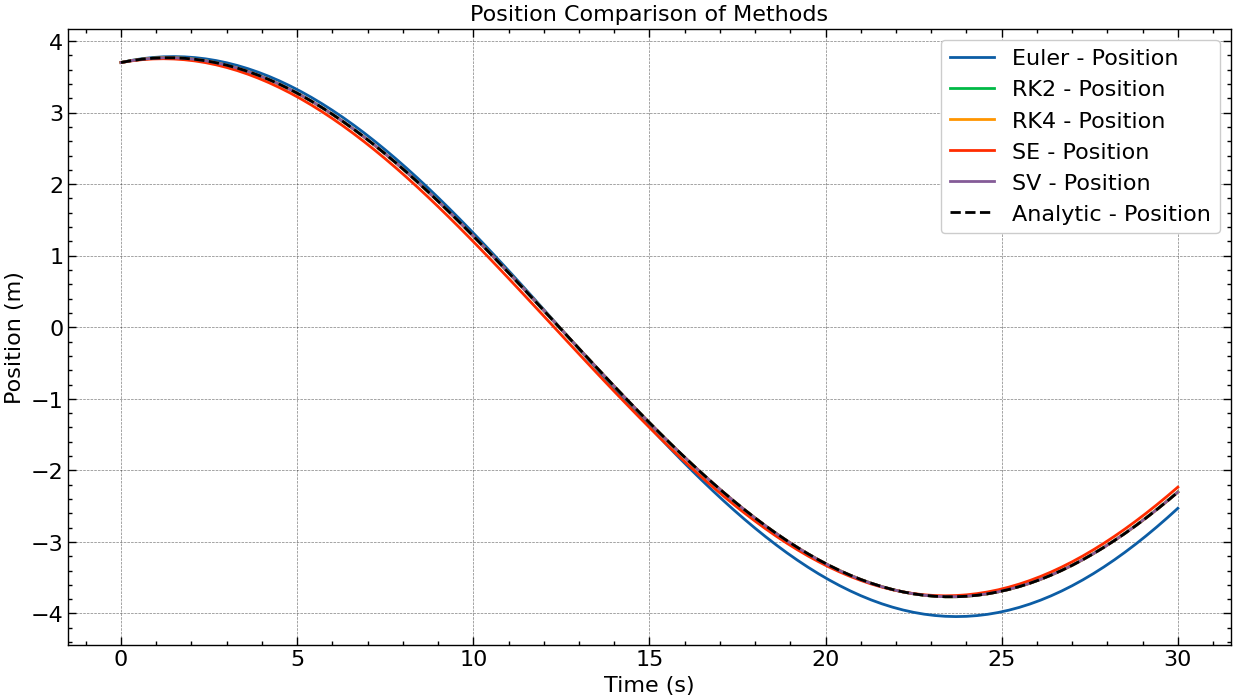

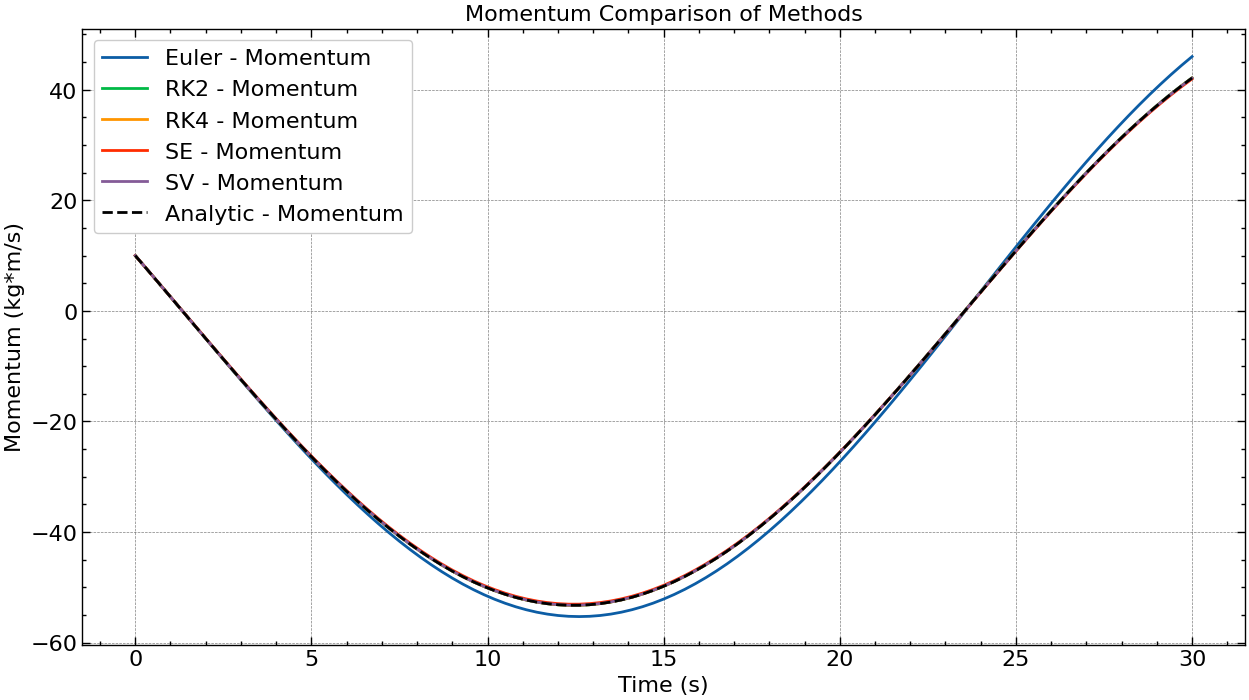

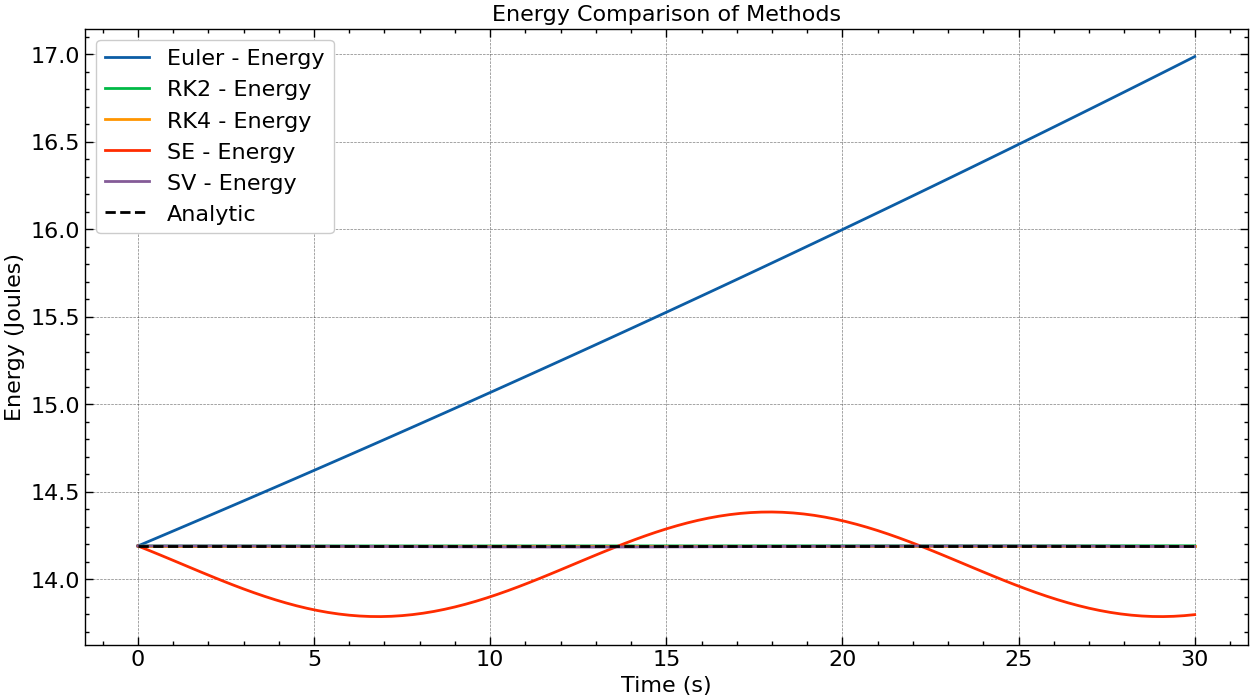

In [96]:
DynamicTest(spring=2, mass=100, Q0=3.7, P0=10, stepSize=0.3, total_time=30)

On the other hand, when step size is made small, RK4 and SV seems to be the most reliable at solving the equation, whereas SE and Euler has tiny fluctuation in energy. However, they are all actually very good when the step size is small.